In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [20]:
data = pd.read_csv('Real_Estate.csv')
print(data.head(2))

             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   

   House price of unit area  
0                  6.488673  
1                 24.970725  


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
None


In [11]:
data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [10]:
data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

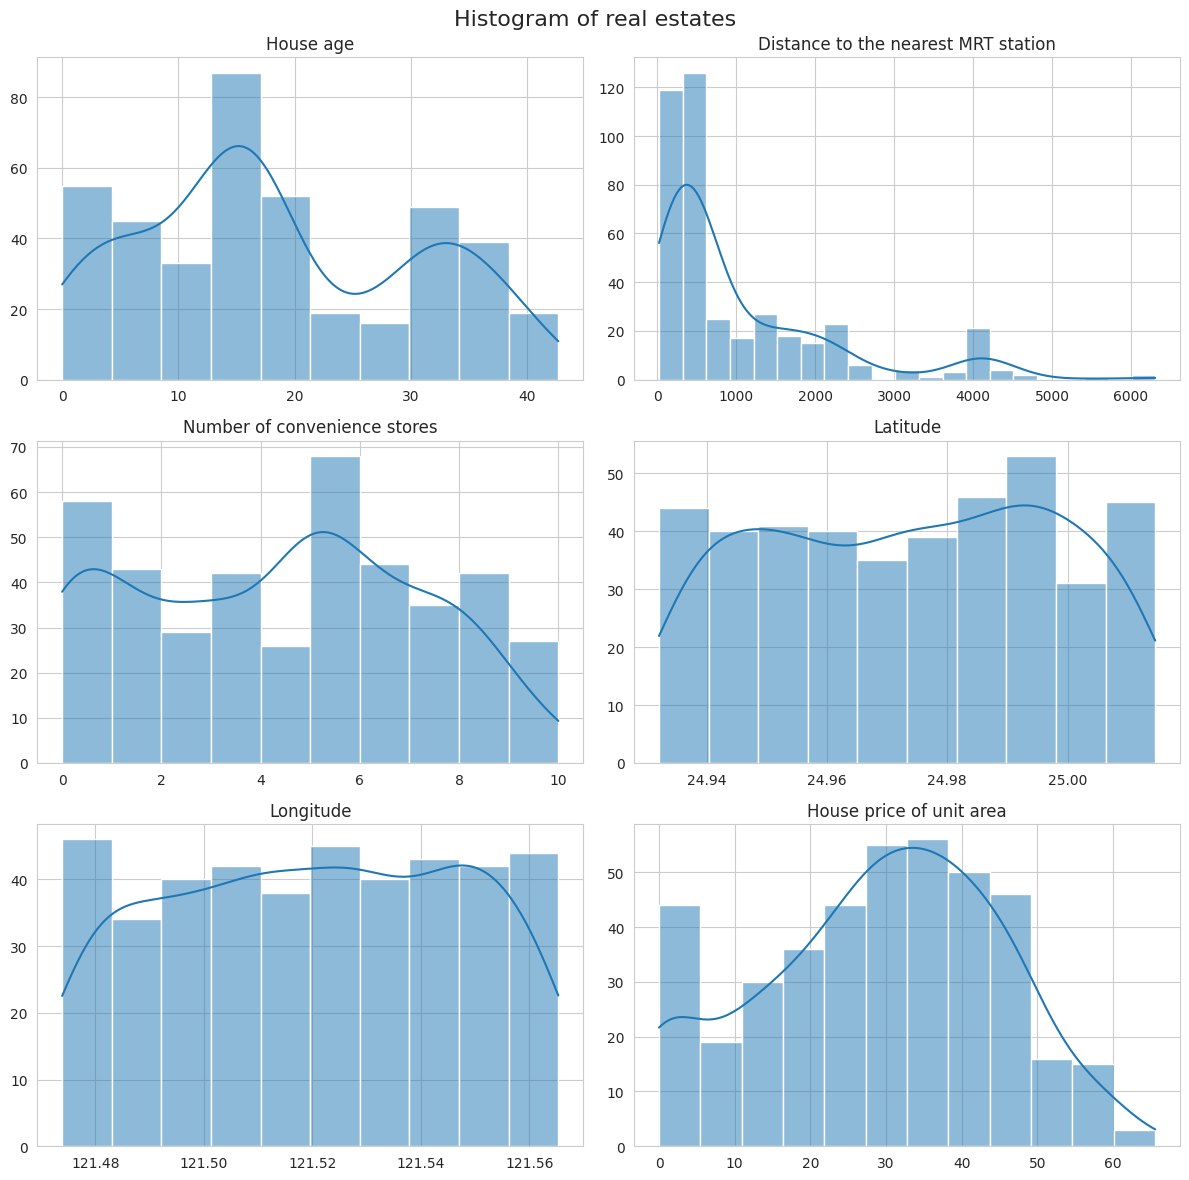

In [13]:
sns.set_style('whitegrid')

fig , axes = plt.subplots(nrows=3,ncols=2,figsize=(12,12))

fig.suptitle("Histogram of real estates",fontsize=16)
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']

for i, col in enumerate(cols):
    sns.histplot(data[col],kde=True , ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(col)
    axes[i//2,i%2].set_xlabel('')
    axes[i//2,i%2].set_ylabel('')
plt.tight_layout()
plt.show()

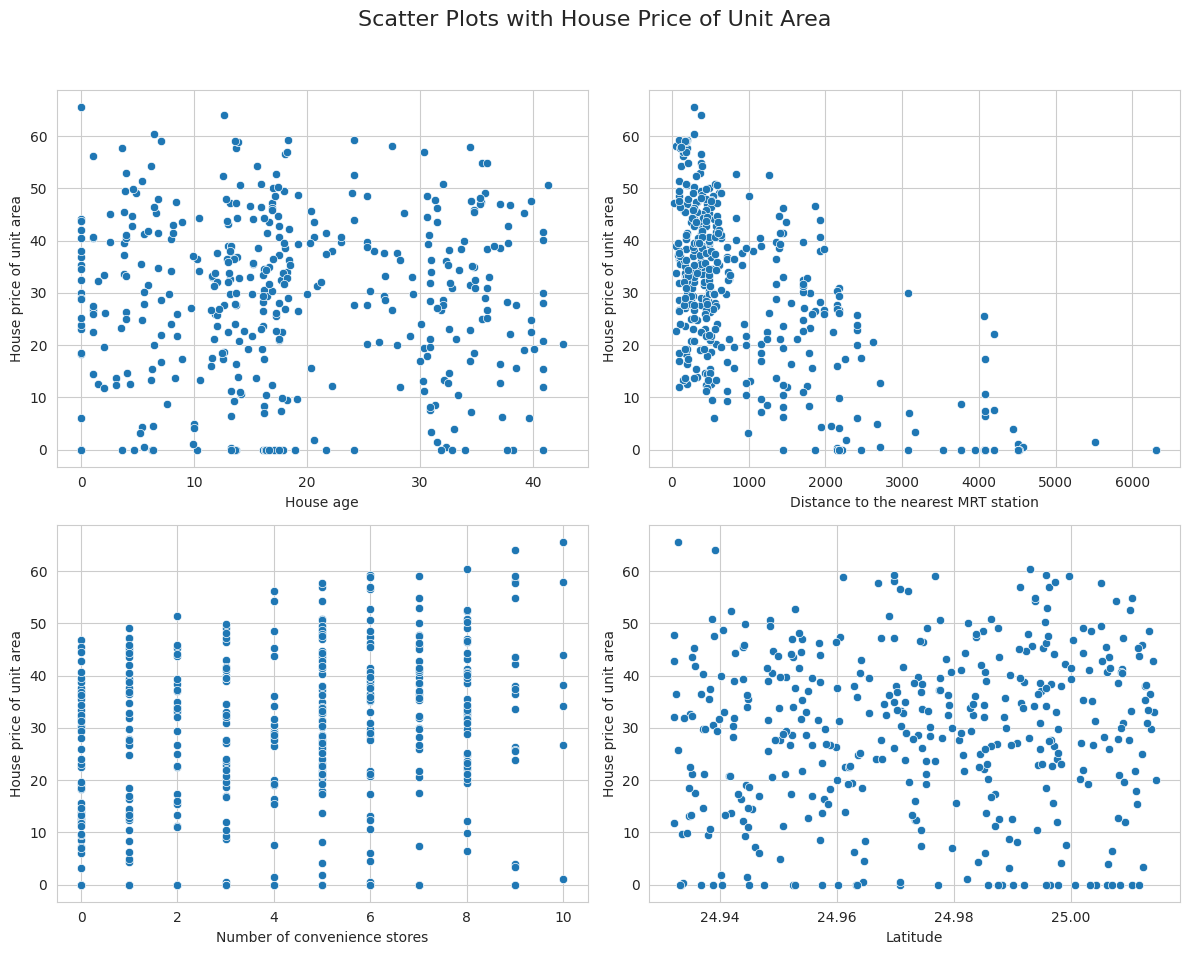

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

sns.scatterplot(data=data, x='House age', y='House price of unit area', ax=axes[0, 0])
sns.scatterplot(data=data, x='Distance to the nearest MRT station', y='House price of unit area', ax=axes[0, 1])
sns.scatterplot(data=data, x='Number of convenience stores', y='House price of unit area', ax=axes[1, 0])
sns.scatterplot(data=data, x='Latitude', y='House price of unit area', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix =data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

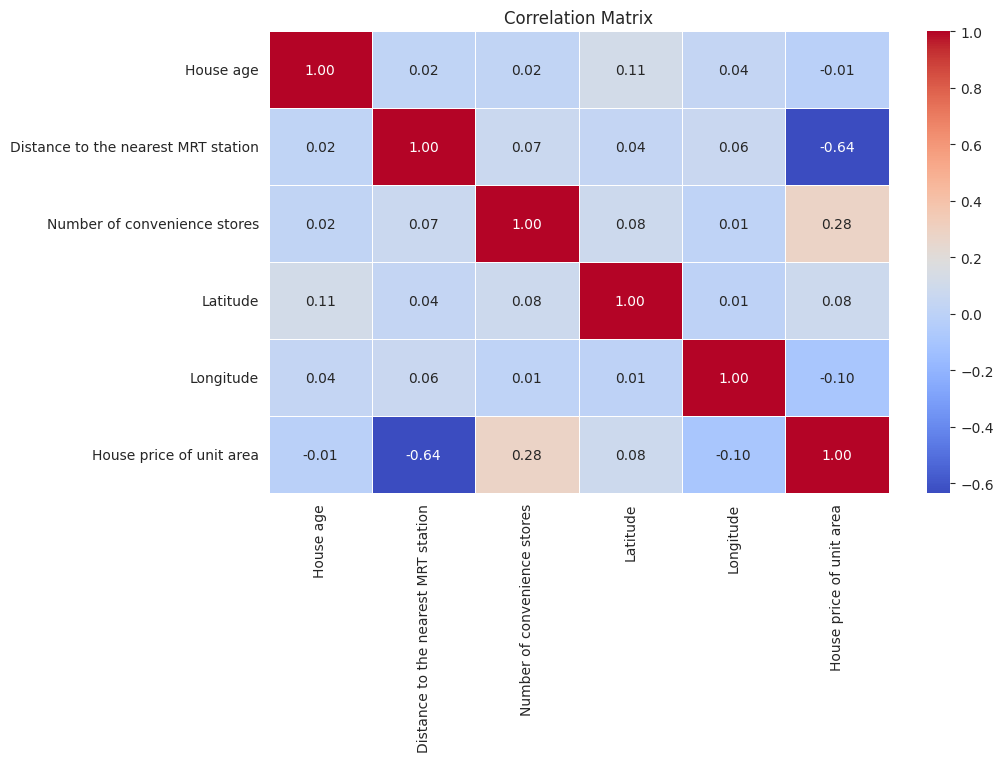

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [22]:
# Only keep numeric columns for correlation
numeric_data = data.select_dtypes(include='number')

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot it
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation matrix
print(correlation_matrix)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

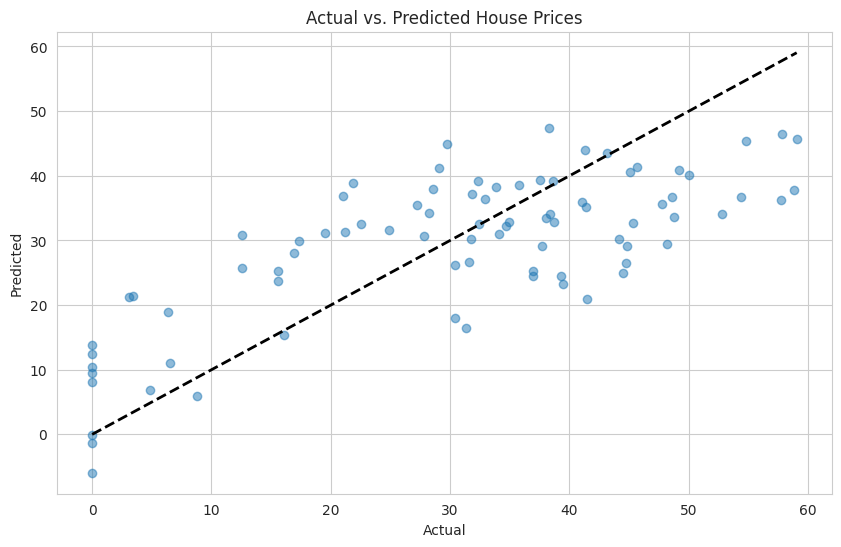

In [30]:
y_pred_lr = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [35]:
import joblib 
joblib.dump(model, 'house_price_model.pkl')
print("✅ Model saved as 'house_price_model.pkl'")

✅ Model saved as 'house_price_model.pkl'


In [36]:
# Load the saved model
model = joblib.load('house_price_model.pkl')

# Make predictions using new data
new_data = pd.DataFrame({
    'Distance to the nearest MRT station': [150.0],
    'Number of convenience stores': [5],
    'Latitude': [24.975],
    'Longitude': [121.540]
})

prediction = model.predict(new_data)
print("🏡 Predicted House Price per Unit Area:", prediction[0])


🏡 Predicted House Price per Unit Area: 37.21218706525178
